# Lab Session #6.1
## Computational Neurophysiology [E010620A]
### Dept of Electronics and Informatics (VUB) and Dept of Information Technology (UGent)
Fotios Drakopoulos, Jorne Laton, Lloyd Plumart, Talis Vertriest, Jeroen Van Schependom, Sarah Verhulst

<font color=blue>Student names and IDs:</font> César Zapata - 02213600
<br>
<font color=blue>Academic Year:</font> 2022-2023

# Unsupervised and supervised learning

This exercise is adapted from the examples provided in the textbook "Neuronal Dynamics" by Gerstner, Kistler, Naud, Paninski (2014, Cambridge University Press) and the 2020 Neuron publication "Artificial Neural Networks for Neuroscientists: A Primer" publication by GR Yang and X-J Wang. Code adapted into exercise by Fotios Drakopoulos and Sarah Verhulst, UGent, 2021.

## Supervised learning: Oja's rule in Hebbian Learning <a id="introduction"></a>

The figure below shows the configuration of a neuron learning from the joint input of two presynaptic neurons. 

<img src='Oja_setup.png' width="400" height="400">

In this first part of the exercise, you will evaluate how the behavior of the pre-synaptic inputs and learning rate affect the weight optimisation under Oja's learning rule. The below code executes and plots the synaptic weights and post-synaptic firing rates given a cloud of presynaptic firing rates. You can modify the learning rate *eta* as well as the relationship between the pre-synaptic data by changing the *ratio* parameter. 

The final weight vector w for eta=0.04 is: (0.4549049920265074,0.8911829694971338)
The final weight vector w for eta=0.2 is: (0.4758765133172438,0.8686828925171485)


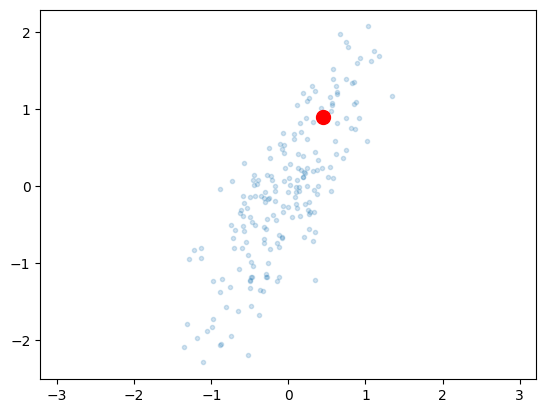

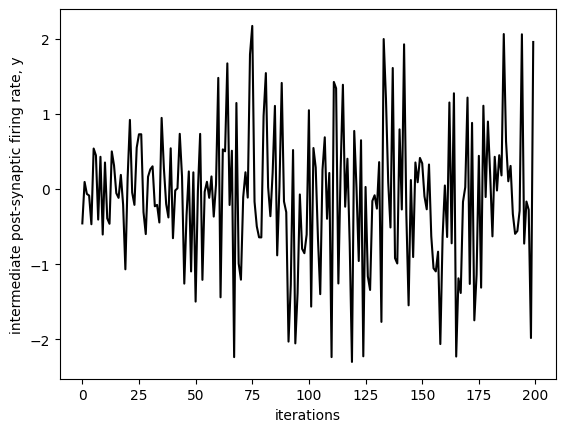

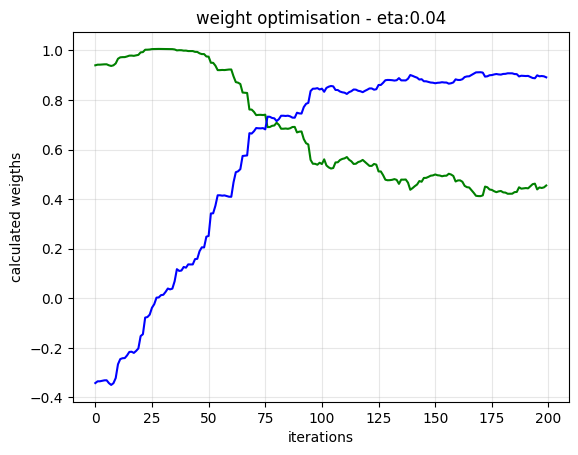

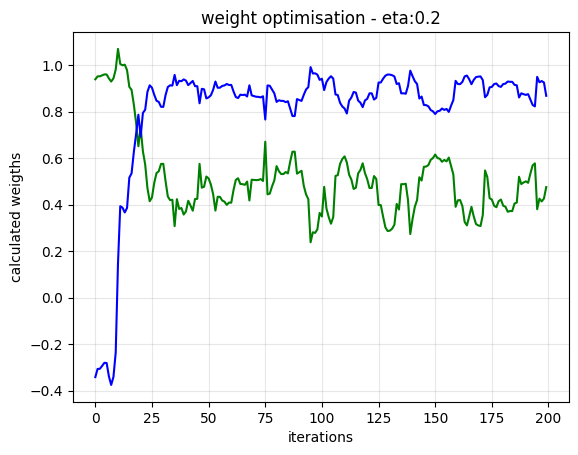

In [9]:
%matplotlib inline  
import oja as oja
import matplotlib.pyplot as plt
import numpy as np

cloud = oja.make_cloud(n=200, ratio=.3, angle=60)
wcourse, out = oja.learn(cloud, initial_angle=-20, eta=0.04)

# plotting 
plt.scatter(cloud[:, 0], cloud[:, 1], marker=".", alpha=.2)
plt.plot(wcourse[-1, 0], wcourse[-1, 1], "or", markersize=10)
plt.axis('equal')

plt.figure()
plt.plot(out[:, 0], "k")
plt.xlabel("iterations")
plt.ylabel("intermediate post-synaptic firing rate, y")

plt.figure()
plt.plot(wcourse[:, 0], "g")
plt.plot(wcourse[:, 1], "b")
plt.grid(alpha=0.3)
plt.xlabel("iterations")
plt.ylabel("calculated weigths")
plt.title("weight optimisation - eta:0.04")

print("The final weight vector w for eta=0.04 is: ({},{})".format(wcourse[-1,0],wcourse[-1,1]))


wcourse, out = oja.learn(cloud, initial_angle=-20, eta=0.2)

plt.figure()
plt.plot(wcourse[:, 0], "g")
plt.plot(wcourse[:, 1], "b")
plt.grid(alpha=0.3)
plt.xlabel("iterations")
plt.ylabel("calculated weigths")
plt.title("weight optimisation - eta:0.2")

print("The final weight vector w for eta=0.2 is: ({},{})".format(wcourse[-1,0],wcourse[-1,1]))



### Q1: Oja learning <a id="Q1"></a>

Run the above code and get a feeling for what the function and figures do. You can think of each of the two columns of the cloud as the time series of firing rates of the presynaptic neurons $\nu_1$ and $\nu_2$.

- Change the learning rate eta from the original value to a much larger value 0.2, qualitatively describe the effect of this change on the weight optimisation

The original data-cloud of pre-synaptic firing rates showed correlations between the firing rates. For the next simulation, you will simulate how study Oja’s rule works on a data set which has no correlations. 

- You can modify the *ratio* parameter in the make_cloud funtion and set it to 1 to simulate circular data-sets (i.e. no correlations between the pre-synaptic firing rates). Evaluate the time course of the weight vectors when ratio is set to 1, and repeat the simulations many times (e.g. 100) to evaluate what Oja's rule is doing for this type of data. Each time you call the *learn* function, it will choose a new set of random initial conditions. Can you explain what happens to the final weight estimate and the time-course of the weights?

- Now do this for different learning rates eta, and qualitatively describe the effects

- Lastly, return to a cloud ratio of 0.3, and repeat the simulations e.g. 100 times. What is the difference in learning do you observe between the 0.3 and 1 ratio conditions for a learning rate eta of 0.04?

* [Fill in answer here](#A1)

### Q2: Oja final weights <a id="Q2"></a>

If we assume a linear firing rate model, we can write $\nu^{post}=\sum_{j}w_{j}\nu_{j}^{pre}=w \cdot \nu^{pre}$, where the dot denotes a scalar product, and hence the output rate $\nu^{post}$ (or $y$) can be interpreted as a projection of the input vector onto the weight vector. 

- After learning (e.g. ratio 0.3 and eta 0.04), what does the output y tell about the input? Can you see a resemblance between Oja's learning rule and a principle component analysis?

- Take the final weights [w31, w32], then calculate a single input vector (v1=?, v2=?) that leads to a maximal output firing y. You can perform this procedure by first constraining your input to norm([v1,v2]) =1 to write v2 as a function of v1. Then simulate $y$ for v1 in range between -1 and +1 to graphically determine the maximal firing rate (no need to compute the derivative). 

- Perform the same procedure, but now calculate the input vector which leads to a minimal output firing y.

The above exercises assume that the input activities can be negative (indeed the inputs were always statistically centered). In actual neurons, if we think of their activity as their firing rate, this cannot be less than zero.

- Repeat the simulations from this block, but by applying the learning rule on a noncentered data cloud. E.g., use cloud = (3,5) + oja.make_cloud(n=1000, ratio=.4, angle=-45), which centers the data around (3,5). What conclusions can you draw? Can you think of a modification to the learning rule?

* [Fill in answer here](#A2)

## Answers
#### A1: Oja Learning  <a id="A1"></a>
* [Go back to Q1](#Q1) 

In [4]:
# function to visualize 
def see_network_iter(iterations, n, ratio, eta):

    weights_arr = np.zeros((iterations, n, 2)) # 100 iterations, 200 neur

    for i in range(iterations):
        cloud = oja.make_cloud(n=n, ratio=ratio, angle=60)
        wcourse, out = oja.learn(cloud, initial_angle=-20, eta=eta)

        weights_arr[i, :] = wcourse
        plt.plot(wcourse[:, 1]) # final weight estimate
    
    plt.title(f"Weights - ratio: {ratio}, eta: {eta}")
    plt.ylabel("Calculated weights")
    plt.xlabel("Iterations")
    plt.show()

    print(f"The final weight vector w is: ({wcourse[-1,0]}, {wcourse[-1,1]})")

    return wcourse

<div class="alert alert-success">
<span style="color:black">

**Q1.1 Answer** 
    
\begin{tcolorbox}[colback=green!5]
    
Changing the learning rate (eta) from 0.04 to 0.2 (5 times larger) presents a significant increase in the velocity of the weight optimisation. For an eta of 0.04 we can observe that the crossing of the weights occurs at the ~80th iteration, while the same takes place at the ~20th iteration for an eta of 0.2. However, while having a small value for eta makes the updating slower but more precise, increasing the eta no only makes the convergence faster, but also may result in overshooting or inestability.

\end{tcolorbox}
     
</span>

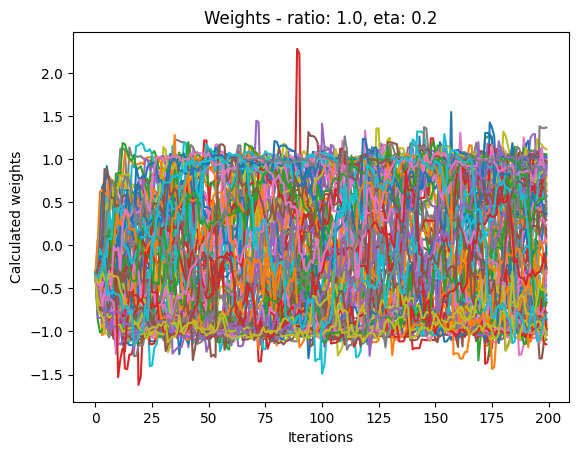

The final weight vector w is: (-0.4213387067697722, -0.8358683779303483)


In [5]:
f_weights_no_correlation = see_network_iter(100, 200, 1.0, 0.2) # changing ratio from 0.3 to 1 -> no correlation, circular dataset

<div class="alert alert-success">
<span style="color:black">

**Q1.2 Answer** 
    
\begin{tcolorbox}[colback=green!5]
    
With a ratio=1.0 and an eta=0.2, we can observe that the weights do not converge anywhere, thus, there is no learning behavior occurring, no strengthening of the connections at all.

\end{tcolorbox}
     
</span>

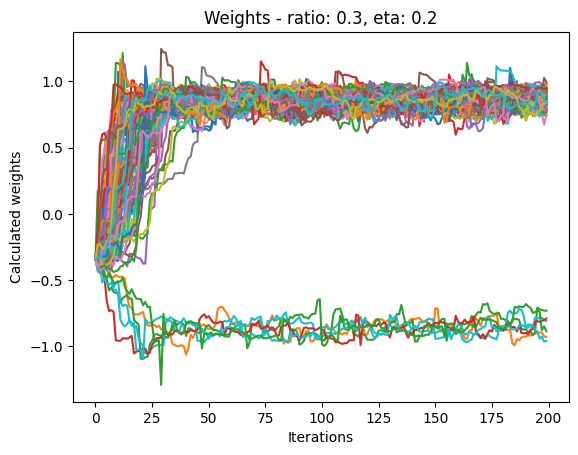

The final weight vector w is: (0.5692187759692571, 0.8373060376421639)


In [6]:
f_weights_correl = see_network_iter(100, 200, 0.3, 0.2) # ratio back to 0.3

<div class="alert alert-success">
<span style="color:black">

**Q1.3 Answer** 
    
\begin{tcolorbox}[colback=green!5]
    
With a ratio=0.3 and an eta=0.2 we can see that there is a clear trend to converge and we can say that there is learning. However, there are some cases where the model diverged, which happens due to the instability that such a large value for eta presents.

\end{tcolorbox}
     
</span>

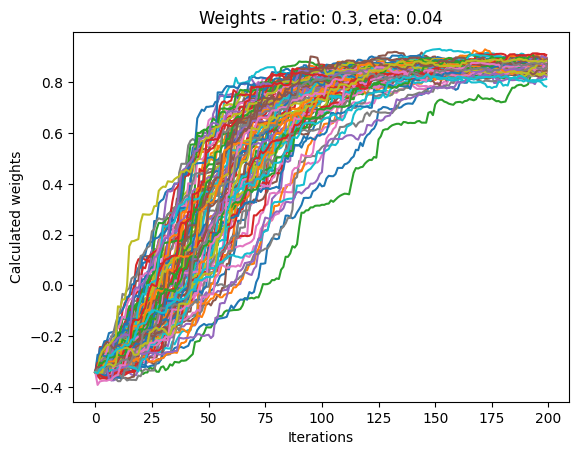

The final weight vector w is: (0.5824258446676776, 0.8131594314932681)


In [7]:
f_weights_eta_005 = see_network_iter(100, 200, 0.3, 0.04) # changing eta

<div class="alert alert-success">
<span style="color:black">

**Q1.4 Answer** 
    
\begin{tcolorbox}[colback=green!5]
    
For a ratio=0.3 and an eta=0.04 we can observe a decisive converging of the weights, with the instability problem presented in the las plot completely gone. However, it is also evident that instead of the ~20 iterations that takes the weights to converge in the last exercise, the model now takes an average of ~75 to 80 iterations to stabilize around a value.

\end{tcolorbox}
     
</span>

#### A2: Oja final weights  <a id="A2"></a>
* [Go back to Q2](#Q2) 

The final weight vector w is: (0.4946781076602923, 0.8702139473064415)


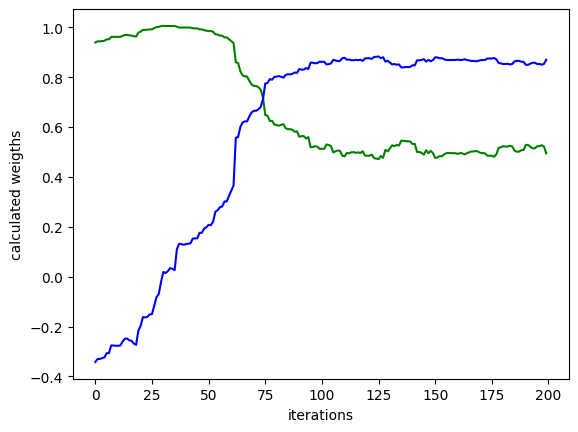

In [11]:
cloud = oja.make_cloud(n=200, ratio=.3, angle=60)
f_weights_03_004, out = oja.learn(cloud, initial_angle=-20, eta=0.04)

# plotting 
plt.plot(f_weights_03_004[:, 0], "g")
plt.plot(f_weights_03_004[:, 1], "b")
plt.xlabel("iterations")
plt.ylabel("calculated weigths")

print(f"The final weight vector w is: ({f_weights_03_004[-1,0]}, {f_weights_03_004[-1,1]})")

<div class="alert alert-success">
<span style="color:black">

**Q2.1 Answer** 
    
\begin{tcolorbox}[colback=green!5]
    
When the convergence of weights happens, the weight vector becomes one of the eigenvectors of the covariance matrix, and then the output of the neuron becomes the corresponding principal components. This makes sense knowing that the Principal components are defined as the inner products between the eigenvectors and the input vectors. Following this logic, the neuron learning with the Oja's rule becomes a Principal Component Analyzer.

\end{tcolorbox}
     
</span>

y: [-0.49467811 -0.22840475 -0.10992735 -0.01685225  0.06262221  0.13310758
  0.19698615  0.25568139  0.31012474  0.36096482  0.40867412  0.45360864
  0.49604365  0.53619624  0.57424028  0.61031656  0.64454001  0.67700477
  0.70778803  0.7369528   0.76455003  0.79062014  0.81519426  0.83829503
  0.85993724  0.88012818  0.89886786  0.91614897  0.93195674  0.94626851
  0.95905318  0.97027029  0.97986892  0.98778604  0.99394448  0.99825008
  1.00058793  1.00081723  0.99876411  0.99421147  0.98688406  0.97642586
  0.9623644   0.94405105  0.92055436  0.89045088  0.85135831  0.79866509
  0.72056958  0.49467811]


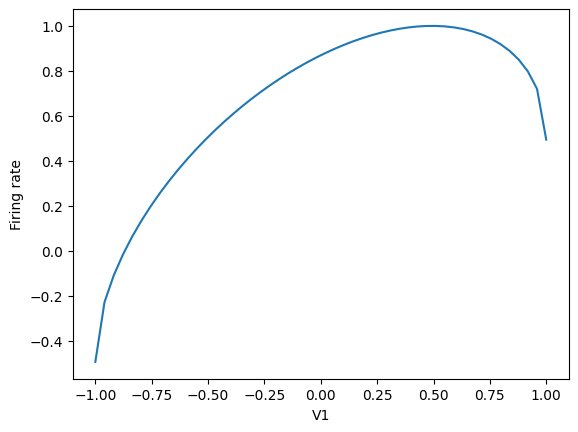


max value: 1.0008172255184271
The max value is at position: 37 (item N° 38)


In [13]:
V1 = np.linspace(-1, 1)
V2 = np.sqrt((1-V1)*(1+V1)) # From Equation: V2^2 = 1^2 - V1^2 -> V2 = square root of (1-V1)^2 = sqrt((1-V1)*(1+V1))

w_out = f_weights_03_004[-1]

y = np.dot(np.array([V1, V2]).T, w_out)
print(f"y: {y}")

w1, w2 = f_weights_03_004[-1, 0], f_weights_03_004[-1, 1]

firing_rate_03_004 = w1*V1 + w2*V2 # calculating firing rate -> w1*V1 + w2*V2

# plotting
plt.plot(V1, firing_rate_03_004)
plt.xlabel("V1")
plt.ylabel("Firing rate")
plt.show()

# calculating values of V1, V2 for the max firing rate 
max_pos_03_004 = np.argmax(firing_rate_03_004)
print(f"\nmax value: {max(firing_rate_03_004)}\nThe max value is at position: {max_pos_03_004} (item N° {max_pos_03_004+1})")


In [14]:
# calculating values of V1, V2 for the min firing rate 
min_pos_03_004 = np.argmin(firing_rate_03_004)
print(f"min value: {min(firing_rate_03_004)}\nThe min value is at position: {min_pos_03_004} (item N° {min_pos_03_004+1})")

min value: -0.4946781076602923
The min value is at position: 0 (item N° 1)


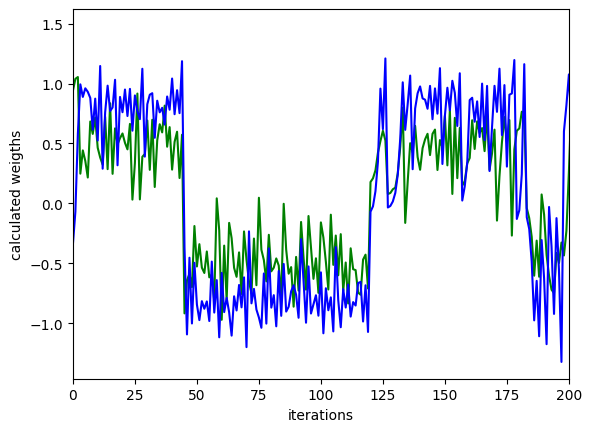

The final weight vector w is: (0.571180934506192, 0.8054130226228298)


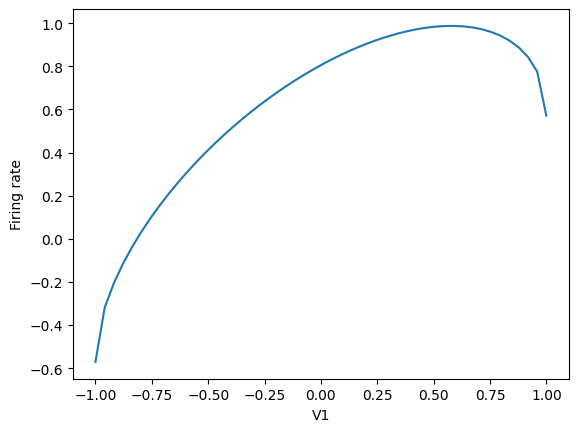


max value: 0.987255359526267
The max value is at position: 39 (item N° 40)

min value: -0.571180934506192
The min value is at position: 0 (item N° 1)


In [21]:

cloud = (3, 5) + oja.make_cloud(n=1000, ratio=.4, angle=-45)
# cloud = oja.make_cloud(n=1000, ratio=.4, angle=-45)
wcourse, out = oja.learn(cloud, initial_angle=-20, eta=0.04)

# plotting 
plt.plot(wcourse[:, 0], "g")
plt.plot(wcourse[:, 1], "b")
plt.xlabel("iterations")
plt.ylabel("calculated weigths")
plt.xlim([0, 200])
plt.show()

print(f"The final weight vector w is: ({wcourse[-1,0]}, {wcourse[-1,1]})")


# V1, V2, w1, w2
V1 = np.linspace(-1, 1)
V2 = np.sqrt((1-V1)*(1+V1)) # From Equation: V2^2 = 1^2 - V1^2 -> V2 = square root of (1-V1)^2 = sqrt((1-V1)*(1+V1))
w1, w2 = wcourse[-1, 0], wcourse[-1, 1]

firing_rate = w1*V1 + w2*V2 # calculating firing rate -> w1*V1 + w2*V2

# print(firing_rate)
plt.plot(V1, firing_rate)
plt.xlabel("V1")
plt.ylabel("Firing rate")
plt.show()

# calculating values of V1, V2 for the max firing rate
max_pos = np.argmax(firing_rate)
print(f"\nmax value: {max(firing_rate)}\nThe max value is at position: {max_pos} (item N° {max_pos+1})")


# calculating values of V1, V2 for the max firing rate
min_pos = np.argmin(firing_rate)
print(f"\nmin value: {min(firing_rate)}\nThe min value is at position: {min_pos} (item N° {min_pos+1})")